In [ ]:
#this file is meanto serve as a guide/tutorial for some of the basics from rdkit package.
#rdkit basics are needed for DeepLearning in Chemistry and biological science

In [ ]:
#SMILE notation system is used in computer science to educate chemistry to the computer.
#if you hated organic chemistry in your college life, don't be paniced by another form of writing the molecules.
#Think SMILE notation as a translator that helps us, human, communicate with the computer.
#read more about the #SMILE here: https://archive.epa.gov/med/med_archive_03/web/html/smiles.html

In [1]:
#we can convert SMILE to something 'mol' object, and rdkit uses the mol object to perform various function on it.
#most of the rdkit's operations can be found in rdkit.Chem module.
# let's import rdkit
import rdkit
from rdkit import Chem

# Read, Write, and Draw

In [2]:
#lets create a list of few molecules in the SMILE format.

a = ['C1CCOC1', 'C1CCNCC1', 'CC(C)=O', 'COC(=O)c1ccccc1O']

In [6]:
#in order RDKIT to interpret these strings, it needs to be converted into a mol object, and then rdkit will be able to understand it

from rdkit import Chem
mol_a= [Chem.MolFromSmiles(molecules)for molecules in a]

In [7]:
mol_a #you can see her that mol_a is now a mol object for rdkit

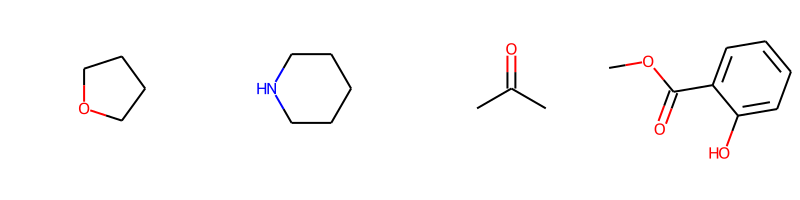

In [9]:
#once you have created the mol object, you can do multiple things on it, lets print out the structures
from rdkit.Chem.Draw import MolsToGridImage
MolsToGridImage(mol_a, molsPerRow=4)

In [14]:
#you can also read molecules as MolFromMolFile('filepath') 
#supppliers often provides .sdf file, which can also be coverted to mol object and read.

suppl_b = Chem.SDMolSupplier('Acetophenones.sdf')    #let's import the file first, this is a sdf file i have downloaded from the Indofine Chemical Company website
mol_b =[molecules for molecules in suppl_b]          # we have converted into mol object
len(mol_b)                                           # let's see how many molecules we have been supplied



98

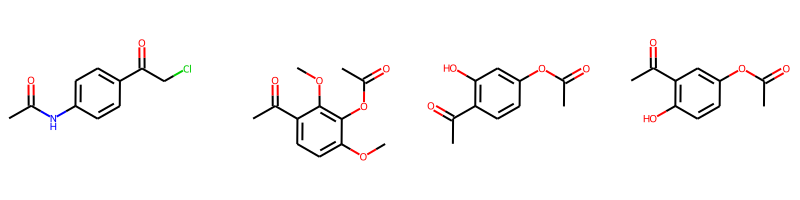

In [18]:
#we had a total of 98 molecules in that file supplied by a supplier
#let's printout first 4 molecules from here

MolsToGridImage(mol_b, maxMols=4, molsPerRow =4)



In [19]:
#you can convert the mol object back to smile
smile_a = [Chem.MolToSmiles(molecules) for molecules in mol_a]
print(smile_a)   

#smile_a is the same list a in the begining

['C1CCOC1', 'C1CCNCC1', 'CC(C)=O', 'COC(=O)c1ccccc1O']


# Indexing and Finding Substructure

In [26]:
c = Chem.MolFromSmiles('C1CCNCC1')
for atoms in c.GetAtoms():
    print(atoms.GetAtomicNum())   # we are getting atomic number for each of the atoms

    

6
6
6
7
6
6


In [35]:
d = Chem.MolFromSmiles('CC(C)=O')
for atoms in d.GetAtoms():
    print(atoms.GetAtomicNum())
print(d.GetBonds()[2].GetBondType())  #wecan get the type of the bonds for certain index

6
6
6
8
DOUBLE


In [41]:
#more examples of such commands:
d.GetAtomWithIdx(3).GetSymbol()   #or d.GetAtoms()[3].GetSymbol()

'O'

In [58]:
#let's check if any of the molcules in our list a has the following fragment (C-N-C)
fragment = Chem.MolFromSmarts('CNC')
match = [molecule.GetSubstructMatch(fragment) for molecule in mol_a]
print(match)

[(), (2, 3, 4), (), ()]


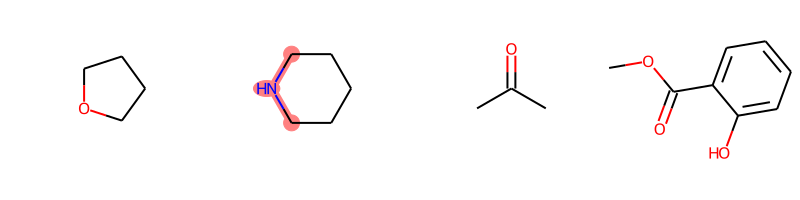

In [59]:
MolsToGridImage(mol_a, molsPerRow=4, highlightAtomLists=match)

In [61]:
#question: Let's find out how many molecules has 'C-N-C' fragment in the list of the compound we have imported from the supplier()
match2= [molecule.GetSubstructMatch(fragment) for molecule in mol_b]
len(match2)

98

1


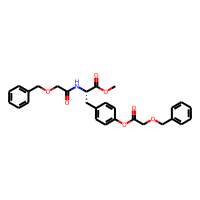

In [66]:
#Question: lets create a list of molecules from our imported list our supplier(Indofine Chemical Company) that has/
#the C-N-C framgent
match_list =[]
for molecule in mol_b:
    if molecule.HasSubstructMatch(fragment):
        match_list.append(molecule)
print(len(match_list))    # we are seeing how many molecules has that fragment

#and then draw the image
MolsToGridImage(match_list, molsPerRow=1)

6


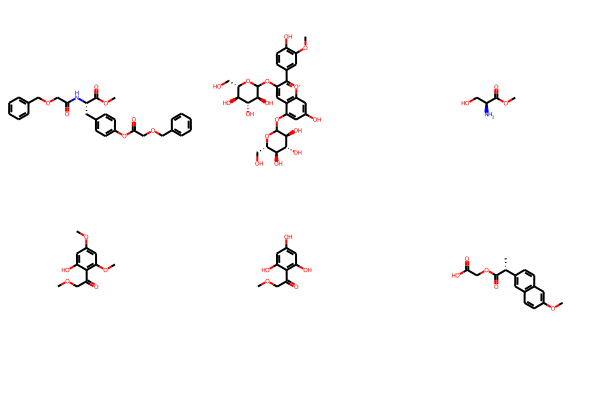

In [70]:
fragment2 = Chem.MolFromSmarts('COC')
match_list2=[]
for molecules in mol_b:
    if molecules.HasSubstructMatch(fragment2):
        match_list2.append(molecules)
print(len(match_list2))
MolsToGridImage(match_list2, molsPerRow=3)

#we had six structures containing C-O-C fragments in that datasets